In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from collections import Counter

In [2]:
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off') 
    ax[1].axis('off')
    f.tight_layout()
    plt.show()

In [6]:
def palette_perc(k_cluster):
    width = 300
    palette = np.zeros((50, width, 3), np.uint8)
    
    n_pixels = len(k_cluster.labels_)
    counter = Counter(k_cluster.labels_) # count how many pixels per cluster
    perc = {}
    for i in counter:
        perc[i] = np.round(counter[i]/n_pixels, 2)
    perc = np.array(list(perc.values()))

    # top5 color * perc = average RGB
    rgb_weight = k_cluster.cluster_centers_.T*perc
    rgb_avg = np.mean(rgb_weight, axis=1)

   
    print('Percentage of color :', perc)
    print('Each RGB :', k_cluster.cluster_centers_)
    print('Avg_RGB :',rgb_avg)
    step = 0
    
    for idx, centers in enumerate(k_cluster.cluster_centers_): 
        palette[:, step:int(step + perc[idx]*width+1), :] = centers
        step += int(perc[idx]*width+1)
        
    return palette

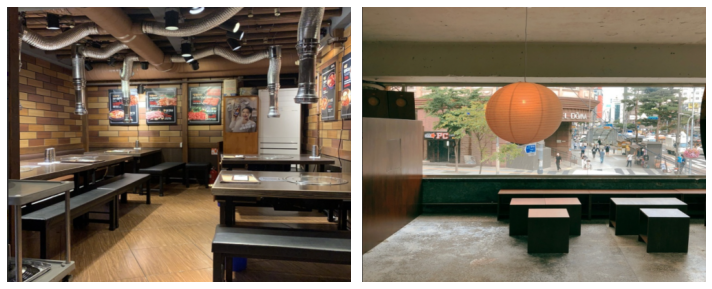

In [7]:
img = cv.imread("/content/drive/MyDrive/딥러닝 review/데캡/옛날농장1.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

img_2 = cv.imread("/content/drive/MyDrive/딥러닝 review/데캡/춤3.jpg")
img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)

dim = (500, 400)
# resize image
img = cv.resize(img, dim, interpolation = cv.INTER_AREA)
img_2 = cv.resize(img_2, dim, interpolation = cv.INTER_AREA)
show_img_compar(img, img_2)

Percentage of color : [0.24 0.31 0.19 0.19 0.07]
Each RGB : [[ 77.95802494  60.23518708  45.51378041]
 [177.99551896 147.88613848 115.19465515]
 [ 29.6433792   21.87471798  17.04706219]
 [121.92893027 102.40187801  83.57400247]
 [209.61139976 196.06716076 178.99251222]]
Avg_RGB : [23.47201473 19.52768046 15.65622571]


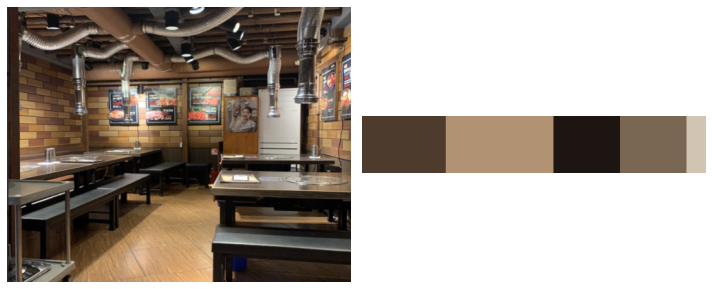

Percentage of color : [0.21 0.3  0.23 0.18 0.09]
Each RGB : [[166.29436673 158.18602434 143.42804886]
 [ 82.23528584  75.23805171  51.74945503]
 [ 14.77248166  26.59365224  15.10636483]
 [144.88521463 120.75150656  95.27592377]
 [216.08930274 211.81533629 205.33617546]]
Avg_RGB : [21.70348989 20.54113442 16.94982255]


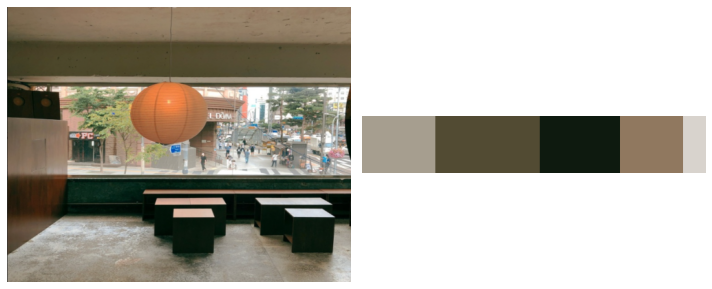

In [8]:
clt = KMeans(n_clusters=5)

clt_1 = clt.fit(img.reshape(-1, 3))
show_img_compar(img, palette_perc(clt_1))
 
clt_2 = clt.fit(img_2.reshape(-1, 3))
show_img_compar(img_2, palette_perc(clt_2))